# Homework # 4 Naive BAYES Classifier

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop Machine learning model to predict Diabetes using Naive Bayes Algorithm. 

### Dataset - Diabetes dataset

This dataset consists of 768 observations & 8 numerical independent variables.
Dependent and target variable is OUTCOME. 1 means diabetes test result being positive, 0 means indicates negative.

Pregnancies: Number of Times Being Pregnant

Glucose: Plasma Glucose Concentration (a 2 hours in an oral glucose tolerance test)

BloodPressure: Diastolic Blood Pressure (mm Hg)

SkinThickness: Triceps Skin Fold Thickness (mm)

Insulin: 2-Hour Serum Insulin (mu U/ml)

BMI: Body Mass Index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes Pedigree Function

Age: Age

Outcome: Class variable ( 0 - 1)



In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_validate
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot  as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

Step 1 - Write code to Read data from dataset into pandas dataframe

In [21]:
data = pd.read_csv("diabetes.csv")

Step 2 - a) Write code to display dataset info 
b) Print 10 rows from dataset.

In [22]:
print(data.info())
print()
print(data.describe())
print()
print(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction     Age  Outcome
count      768.000  768.000        768.000        768.000  768.000 768.000                   768.000 768.000  768.00

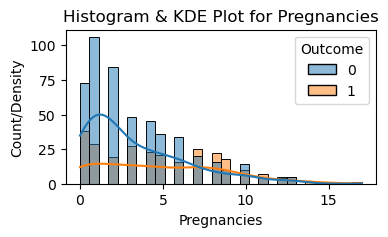

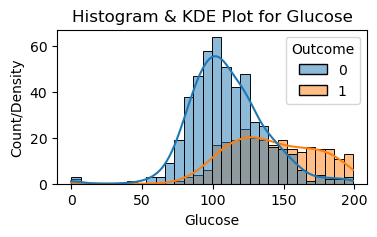

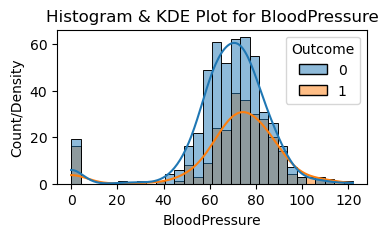

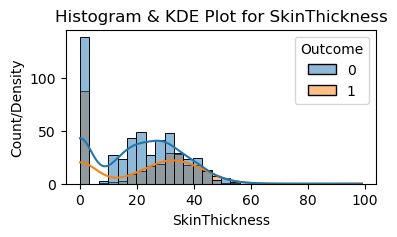

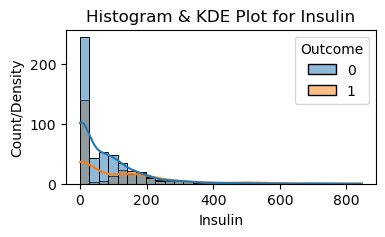

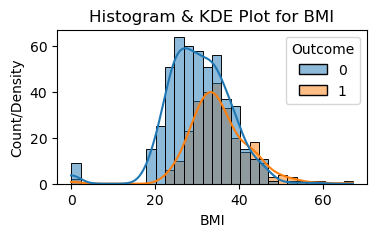

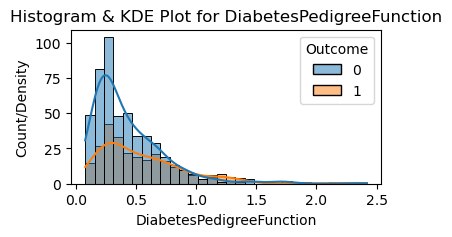

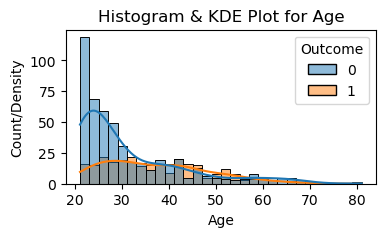

In [24]:
# it's better to draw chart during data exploration, so we use histplot to show relationships between each feature and outcome
feature_columns = data.drop(columns=["Outcome"]).columns
for feature in feature_columns:
    plt.figure(figsize=(4, 2))
    sns.histplot(data=data, x=data[feature], hue=data["Outcome"], bins=30, kde=True)
    plt.title(f"Histogram & KDE Plot for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count/Density")
    plt.show()

Step 3 - Write code to remove Pregnancy column 

In [25]:
data_removePregnancy = data.drop('Pregnancies', axis=1)

Step 4 - Write code to display info of dataset and check shape of dataset.

In [26]:
print(data_removePregnancy.info())
print()
print(data_removePregnancy.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB
None

(768, 8)


Step 5 - Write code to clean data

In [28]:
# clean data by dropping null
data_clean = data_removePregnancy.dropna()
total_rows = len(data_clean)
print(f"total rows after cleaning data: {total_rows}")

# scaling and nommalization excluding the last column "Outcome"
scaler = MinMaxScaler()
data_clean[data_clean.columns[:-1]] = scaler.fit_transform(data_clean[data_clean.columns[:-1]])

# Display the normalized dataset top 10 rows
print(data_clean.head(10))

total rows after cleaning data: 768
   Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction   Age  Outcome
0    0.744          0.590          0.354    0.000 0.501                     0.234 0.483        1
1    0.427          0.541          0.293    0.000 0.396                     0.117 0.167        0
2    0.920          0.525          0.000    0.000 0.347                     0.254 0.183        1
3    0.447          0.541          0.232    0.111 0.419                     0.038 0.000        0
4    0.688          0.328          0.354    0.199 0.642                     0.944 0.200        1
5    0.583          0.607          0.000    0.000 0.382                     0.053 0.150        0
6    0.392          0.410          0.323    0.104 0.462                     0.073 0.083        1
7    0.578          0.000          0.000    0.000 0.526                     0.024 0.133        0
8    0.990          0.574          0.455    0.642 0.455                     0.034 0.533    

Step 6 - Split data into training and testing sets ( 80: 20 ratio)

In [29]:
X = data_clean.drop('Outcome', axis=1)
y = data_clean['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### **Step #7: Initialize your model**




In [30]:
model = GaussianNB()

#### **Step #8: Fit your model, test on the testing data, and create a visualization if applicable**

In [31]:
model.fit(X_train, y_train)

GaussianNB()

Step 9 - Predict using model on test data

In [32]:
y_pred = model.predict(X_test)

Step 10 -  Find accuracy of model

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

accuracy: 0.8051948051948052


Step 11 - Confusion Matrix

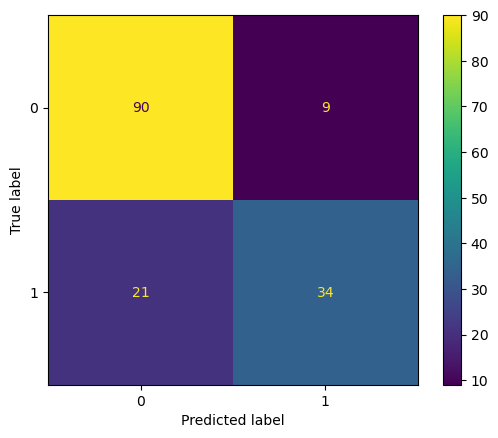

In [34]:
confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [46]:
# print the precision, recall, F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        99
           1       0.79      0.62      0.69        55

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.78       154
weighted avg       0.80      0.81      0.80       154



In [47]:
# print roc_auc_score
roc_auc_score(y_test, y_pred)

0.7636363636363637

In [48]:
correlation_matrix = data_clean.corr()

# Display correlation with outcome column
print(correlation_matrix["Outcome"].sort_values(ascending=False))

Outcome                    1.000
Glucose                    0.467
BMI                        0.293
Age                        0.238
DiabetesPedigreeFunction   0.174
Insulin                    0.131
SkinThickness              0.075
BloodPressure              0.065
Name: Outcome, dtype: float64


In [49]:
print(data_clean.groupby("Outcome").mean())

         Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction   Age
Outcome                                                                                      
0          0.553          0.559          0.199    0.081 0.452                     0.150 0.170
1          0.710          0.581          0.224    0.119 0.524                     0.202 0.268


In [45]:
# the conclusion is that Glucose, BMI, and Age are the top 3 key features to diabetes. 
# patients are most likely to suffer from diabetes if they have higher than average Glucose, BMI, and AGe. Other features
# also have some correlations with diabetes in smaller scale. The model has good performance metrics with good roc_auc score, accuracy, 
# precision, recall, F1-score.